# Project: Investigation of The Movies database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitation">Research Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Brief description of the dataset.
TMDb movie data, which includes details about 10,000 films gleaned from The Movie Database (TMDb), including user ratings and revenue, served as the basis for this analysis.

The following information is supplied for each film that has been released: 
- Popularity of the films 
- Title
- Casts
- Director
- Overview
- Casts
- Director
- Genres, etc.

### Analysis on the following questions:

1. Who is the most popular shooting star within the year range?

2.  - Top 10 genres that have the most movies tag
   
    - 10 Genres with the lowest movies tag
   
3. Which director produces the top 10 most popular movies?

4. Which genres are most prevalent from year to year?

5. Which keywords attract more popularity.

6. Which Genres have the following:
    - Highest vote count
    
    - Lowest vote count
    
7. Which year has the most movie been released?

8. Production companies with highest and lowest movie popularity.

9.  - Does a film with a big budget generate a lot of money?

    - Does the length of a movie affect how much money it makes?

    - Will the length of the movie be determined by its budget?

In [1]:
# Importing of all useful libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


#   'magic word' so that visualizations are plotted inline with the notebook.
%matplotlib inline

#   visualization style to use in plotting 
plt.style.use('fivethirtyeight')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading tmdb-movies.csv 
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Viewing the top 5 dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Shape of TMDB dataset
df.shape

(10866, 21)

In [5]:
# More information about different features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Number of N/A in each feature of the dataset

In [6]:
# Number of blank rows in different columns
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Number of columns with N/A
df.isna().any().value_counts()

False    12
True      9
dtype: int64

It is noticeable that 9 features from TMDB dataset has more than 1 blank rows

### Data Cleaning of TMDB dataset

- Movies that have been recorded repeatedly, or duplicated movies, can be securely discarded.
- Since we will be examining the movies, it is safe to remove "id" and "imdb_id" columns since they serve as unique identifiers for various movies.

- The "homepage" and "overview" columns provide the locations of the films as well as a brief synopsis of each. For the analysis, it is possible to ignore these columns.

The following rows in the dataframe with N/A can be safely deleted:
- Cast (76): This shows that there were no actors in the film.
Director (44): This shows that the movie was not coordinated.
- Genres (23), i.e., It does not fall under any category of film genre.
- Production company, i.e.,This means that no company creates the movies.

Investigating the possibility of duplicated movies

In [8]:
df[df.iloc[:, :2].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Dropping duplicated movies

In [9]:
df.drop_duplicates(subset=['id', 'imdb_id'], inplace=True)

In [10]:
# After movie duplicates were eliminated, were any left?
df.iloc[:, :2].duplicated().any()

False

Dropping of unnecessary columns for the analysis

In [11]:
df.drop(columns=['id', 'imdb_id', 'homepage', 'overview'], inplace=True)

Changing `release_date` to datetime object and also setting it as index of the data frame

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])

df.set_index('release_date', inplace=True)

df.sort_index(inplace=True) # Sorting the dataframe ascending base on the release_date

It is safe to disregard movies without:
- Cast
- Director
- Genres
- Production company

In [13]:
df.dropna(subset=['cast', 'director', 'genres', 'production_companies'], inplace=True)

Each property will be made accessible by turning the following columns, which include strings that are separated by '|,' into a Python list.
- director
- cast
- genres
- production companies
- keywords

In [14]:
def change_to_list(dataframe: pd.DataFrame, columns: list, sep: str ='|')->None:
    """
        change_to_list(dataframe, columns)

        The columns provided will be split base on sep which is default to |.
        And also the dataframe will be changed inplace. 
    """
    for column in columns:
        try:
            dataframe[column] = dataframe[column].str.split(sep)
        except KeyError:
            print(f'{column} not found in the dataset')

In [15]:
change_to_list(df, ['cast', 'genres', 'director', 'keywords', 'production_companies'])

#### Top 5 rows of the dataframe after modification

In [16]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_date,,,,,,,,,,,,,,,,
1972-01-01,0.384193,90000,0,The Last House on the Left,"[Sandra Peabody, Lucy Grantham, David Hess, Fr...",[Wes Craven],It rests on 13 acres of earth over the very ce...,"[rape, gun, birthday, concert, death of a child]",84,"[Horror, Thriller]","[Lobster Enterprises, Sean S. Cunningham Films...",46,6.1,1972,4.693105e+05,0.000000e+00
1972-01-01,0.338541,0,0,Chato's Land,"[Charles Bronson, Jack Palance, James Whitmore...",[Michael Winner],"What Chato's land doesn't kill, Chato will.","[rape, posse, dead horse, canteen, carcass]",110,"[Action, Adventure, Western]",[Scimitar Films],15,6.6,1972,0.000000e+00,0.000000e+00
1972-01-13,0.265891,0,7500000,The Cowboys,"[John Wayne, Roscoe Lee Browne, Bruce Dern, Co...",[Mark Rydell],All they wanted was their chance to be men...a...,"[boy, beef, cattle drive, rancher, cattle]",131,"[Action, Adventure, Drama, Western]",[Warner Bros.],30,6.6,1972,0.000000e+00,3.910921e+07
1972-02-13,0.669045,6000000,0,Cabaret,"[Liza Minnelli, Michael York, Helmut Griem, Jo...",[Bob Fosse],Life is a Cabaret,"[berlin, sex, entertainer, cabaret, gramophone]",124,"[Drama, Music, Romance]","[ABC Pictures, Bavaria Film, Allied Artists Pi...",76,6.9,1972,3.128737e+07,0.000000e+00
1972-03-09,0.450264,1000000,0,Silent Running,"[Bruce Dern, Cliff Potts, Ron Rifkin, Jesse Vi...",[Douglas Trumbull],Amazing companions on an incredible journey......,"[space marine, sunlight, plants, space travel,...",89,"[Adventure, Drama, Science Fiction]","[Universal Pictures, Trumbull/Gruskoff Product...",69,6.1,1972,5.214561e+06,0.000000e+00


#### Information after cleaning the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9772 entries, 1972-01-01 to 2071-12-29
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   tagline               7635 non-null   object 
 7   keywords              8666 non-null   object 
 8   runtime               9772 non-null   int64  
 9   genres                9772 non-null   object 
 10  production_companies  9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
 14  budget_adj            9772 non-null   float64
 15  rev

After data cleaning, both the "keywords" and "tagline" columns still have some missing values; it is ideal to replace these with prior observations.

In [18]:
df.fillna(method='ffill', inplace=True)

NA check after replacement with prior observations

In [19]:
# NA checking
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Dataset shape after cleaning

In [20]:
df.shape

(9772, 16)

Checking for zeros in the budget, revenue, and runtime columns, then replacing them with the mean value of the column.

In [21]:
def zero_replacer(data: pd.DataFrame, columns: list):
    """
        A function to replace all occurences of zeros with the column's mean.
        Columns specified within the list must be of type int/float
    """
    try:
        for column in columns:
            data[column] = data[column].replace({0: data[column].mean().round(0)})
        print('Successfully replaced zero occurences!')
    except:
        print('Error occur!')

In [22]:
columns = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
zero_replacer(df, columns)

Successfully replaced zero occurences!


First two rows of the dataset after zero replacement

In [23]:
# first two rows of the dataset after zero replacement
df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_date,,,,,,,,,,,,,,,,
1972-01-01,0.384193,90000,44231209,The Last House on the Left,"[Sandra Peabody, Lucy Grantham, David Hess, Fr...",[Wes Craven],It rests on 13 acres of earth over the very ce...,"[rape, gun, birthday, concert, death of a child]",84,"[Horror, Thriller]","[Lobster Enterprises, Sean S. Cunningham Films...",46,6.1,1972,4.693105e+05,57053094.0
1972-01-01,0.338541,16179668,44231209,Chato's Land,"[Charles Bronson, Jack Palance, James Whitmore...",[Michael Winner],"What Chato's land doesn't kill, Chato will.","[rape, posse, dead horse, canteen, carcass]",110,"[Action, Adventure, Western]",[Scimitar Films],15,6.6,1972,1.941599e+07,57053094.0


<a id='eda'></a>
## Exploratory Data Analysis

### Summary statistics of the dataset

In [24]:
df.describe(exclude=['O']).round(2)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.00,9.772000e+03,9.772000e+03,9772.00,9772.00,9772.00,9772.00,9.772000e+03,9.772000e+03
mean,0.69,2.404598e+07,6.696239e+07,103.06,239.31,5.96,2000.88,2.885575e+07,8.637367e+07
std,1.04,2.912660e+07,1.162142e+08,27.62,603.01,0.91,13.04,3.161753e+07,1.428436e+08
min,0.00,1.000000e+00,2.000000e+00,3.00,10.00,1.50,1960.00,9.200000e-01,2.370000e+00
25%,0.23,1.617967e+07,3.526309e+07,91.00,18.00,5.40,1994.00,1.941599e+07,4.908911e+07
50%,0.42,1.617967e+07,4.423121e+07,100.00,46.00,6.00,2005.00,1.941599e+07,5.705309e+07
75%,0.78,1.928750e+07,4.423121e+07,112.00,173.00,6.60,2011.00,2.464268e+07,5.705309e+07
max,32.99,4.250000e+08,2.781506e+09,877.00,9767.00,8.70,2015.00,4.250000e+08,2.827124e+09


The statistical analysis of the number columns above reveals that:
- Movie popularity in the dataset ranges from 0 to 32.99, with 32.99 being the highest.
- The movie with the most votes received 9767, while the one with the fewest received 10.
- The dataset's runtime ranges from 3 seconds to 877 seconds.
- The average popularity score for movies in the dataset is 0.69.

### Research Question 1
- Who is the most popular shooting star within the year range?

In [25]:
def value_occurences(data: pd.DataFrame, column: str, most_common:int =5)->pd.DataFrame:
    """
        The function will return a dataframe which contains the most common yearly column count in the dataset.
        
    """
    
    f_data = pd.DataFrame(columns=['Year', column.title(), 'Count'])
    years = data['release_year'].unique()

    for year in years:
        yearlyfeaturecount = Counter() # This will keep count of the yearly data count
        rows = data.query(f'release_year == {year}')[column] # Particular year column data
        for row in rows:
            yearlyfeaturecount.update(row) # Updating the count of each value

        # Temporary variable to hold the current year value count
        temp_df = pd.DataFrame(columns=[column.title(), 'Count'], 
                            data=yearlyfeaturecount.most_common(most_common))
        temp_df['Year'] = np.repeat(year, most_common)

        # Concatenate temp_df with the f_data (Final dataframe)
        f_data = pd.concat([f_data, temp_df], ignore_index=True)
    return f_data

#### The top 2 most used actors yearly

In [26]:
most_popular_shooting_star = value_occurences(df, 'cast', most_common=2)

In [27]:
# Top 10 data from the most_popular_shoting_star dataframe
most_popular_shooting_star.head(10)

,Year,Cast,Count
0,1972,Peter Cushing,4
1,1972,Charles Bronson,2
2,1973,Mitchell Ryan,3
3,1973,Marianna Hill,2
4,1974,Charlotte Rampling,2
5,1974,Gene Wilder,2
6,1975,Jack Nicholson,2
7,1975,Karen Black,2
8,1976,Jodie Foster,4
9,1976,Richard Harris,2


#### Top 2 yearly movies star in the year 2000 and above

In [28]:
# Top 2 most used actors from the year 2000 above
most_popular_shooting_star.query('Year >= 2000').tail(10)

,Year,Cast,Count
78,2011,Nicolas Cage,5
79,2011,Bill Nighy,5
80,2012,Elizabeth Banks,6
81,2012,Bruce Willis,6
82,2013,James Franco,10
83,2013,Danny Trejo,6
84,2014,Liam Neeson,7
85,2014,Jessica Chastain,7
86,2015,Ben Kingsley,6
87,2015,James Franco,6


In [29]:
# Top 10 most used shooting star
top10_most_used_actor = most_popular_shooting_star.sort_values('Count', ascending=False, axis=0).head(10)

In [30]:
top10_most_used_actor

,Year,Cast,Count
82,2013,James Franco,10
85,2014,Jessica Chastain,7
84,2014,Liam Neeson,7
74,2009,Justin Long,7
80,2012,Elizabeth Banks,6
87,2015,James Franco,6
86,2015,Ben Kingsley,6
83,2013,Danny Trejo,6
81,2012,Bruce Willis,6
63,2003,Keanu Reeves,5


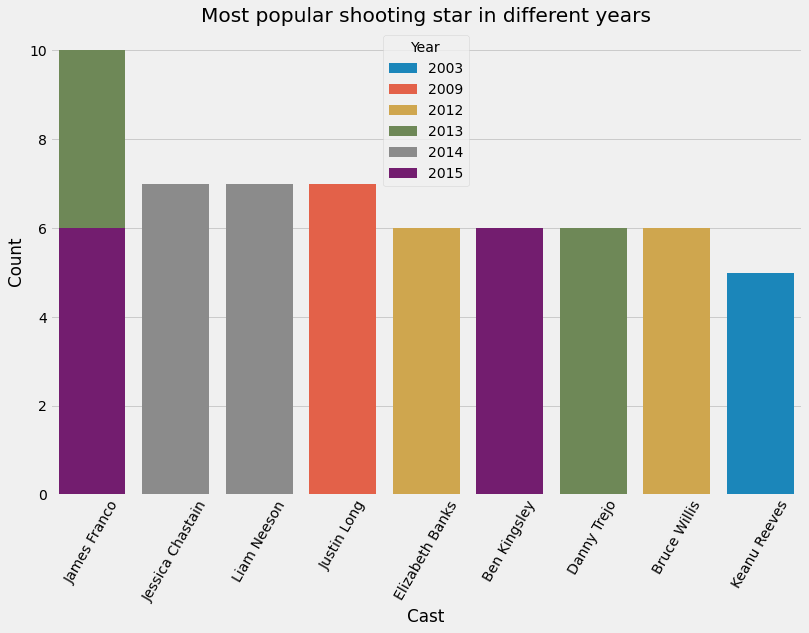

In [31]:
fig, ax = plt.subplots(figsize=(12, 8)) # Plot figure
sns.barplot(x="Cast", y='Count', hue="Year", data=top10_most_used_actor, ax=ax, dodge=False)
plt.title('Most popular shooting star in different years') # Plot title
plt.xticks(rotation=60);

James Franco has made more cast appearances than any other actor in the history of filmmaking.

### Research Question 2  
What are the
- Top 10 genres that has the higest movies tag
- 10 Genres that has the lowest movies tag

In [32]:
def counter(data, column):
    """
        This function will return a dataframe containing the value counts of the specified column which contains list in the data.

    """
    featurecount = Counter() # This will keep count of data count
    for row in data[column]:
        featurecount.update(row)
    f_data = pd.DataFrame(columns=[column.title(), 'Count'], data=featurecount.most_common())
    
    return f_data

In [33]:
# Getting the count of genres and also sorting in descending-order to get the higest genres
genres_count = counter(df, 'genres').sort_values('Count', ascending=False)

In [34]:
# Top 10 Genres with most popularity
top10_genres = genres_count.head(10)

In [35]:
def genre_count_visual(x, y, title):
    """
        Bar plot of genre's count
        
    """
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.bar(x, y) # The plot
    ax.set_title(title) # The plot title
    ax.set_xlabel('Genres')
    ax.set_ylabel('Count')
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=60)

#### Top 10 Genres with highest movie tags

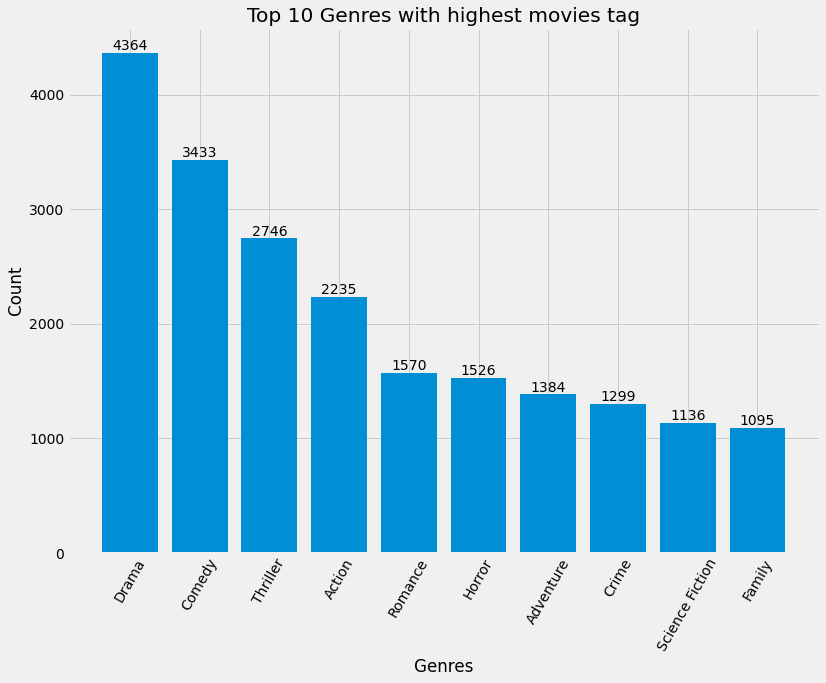

In [36]:
genre_count_visual(top10_genres['Genres'], 
                    top10_genres['Count'], 
                    'Top 10 Genres with highest movies tag')

In [37]:
# 10 Genres with lowest movies tag
last10_Genres = genres_count.tail(10) 

#### 10 Genres with lowest movies tag

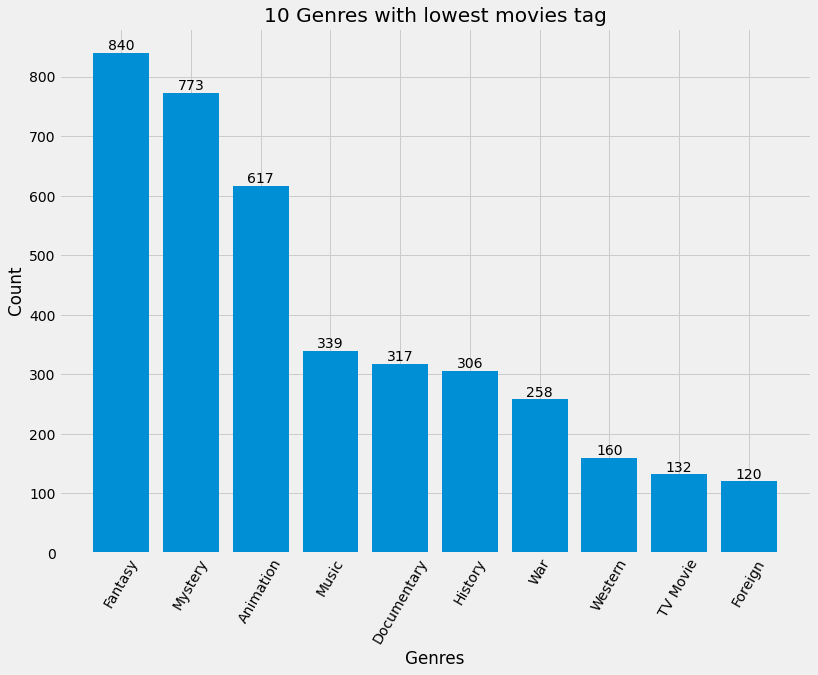

In [38]:
genre_count_visual(last10_Genres['Genres'], 
                    last10_Genres['Count'], 
                    '10 Genres with lowest movies tag')

According to detailed documentation and visual proof, drama, comedy, thriller, and action movies have the highest genre rankings, while western, TV movie, and international films have the lowest ranks.

### Research Question 3
- Which director produces the top 10 most popular movie?

In [39]:
def spilldown(column: str, include: str ='popularity'):
    """
        This function will spill the dataframe's selected column, which includes a list, downward.
        The function will return a dataframe with spilled columns and no popularity if include is set to None.
        Other features from the spilled dataframe can be used with the include attribute.
    """
    if include:
        filldown = df[[column, include]].explode(column)
        return filldown.groupby(column)[include]\
                        .mean()\
                        .sort_values(ascending=False)
    else:
        return df[[column]].explode(column)

In [40]:
director_pop = spilldown('director')

#### Top 10 directors who produce the most popular movies are:

In [41]:
# Top 10 directors with highest movies popularity
top10_directors = pd.DataFrame(director_pop.head(10))
top10_directors

,popularity
director,
Colin Trevorrow,16.696886
David Leitch,11.422751
Chad Stahelski,11.422751
Alan Taylor,6.883129
Christopher Nolan,6.865185
Alex Garland,6.118847
Patrick Tatopoulos,5.806897
Wes Ball,5.553082
Dan Gilroy,5.522641


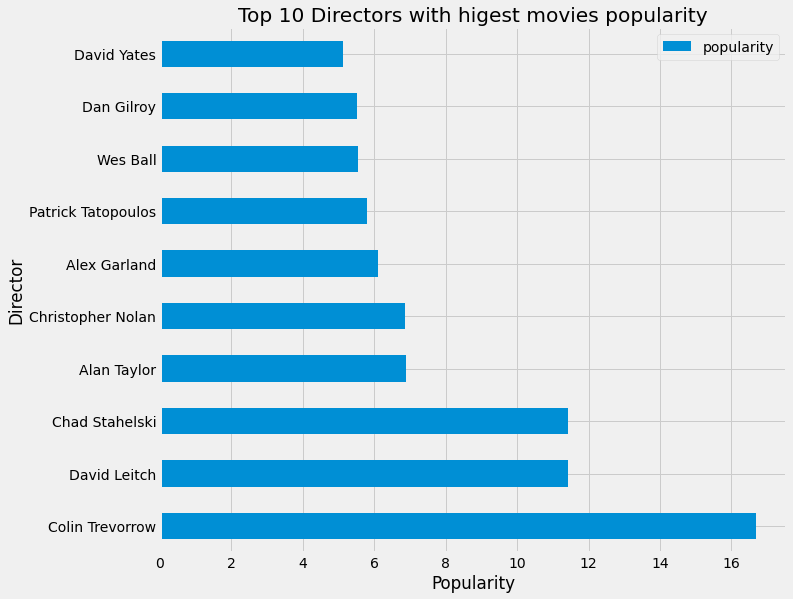

In [42]:
fig, ax = plt.subplots(figsize=(10, 9))
top10_directors.plot.barh(ax=ax);
plt.ylabel('Director')
plt.xlabel('Popularity')
plt.title('Top 10 Directors with higest movies popularity');

The most well-known filmmakers are those listed below, starting with Colin Trevorrow, who has the most well-known films.
- David Leitch and Chad Stahelski, the second-most well-known directors.

###  Research Question 4
- Which genres are most popular from year to year?

In [43]:
yearly_popular_genre = value_occurences(df, 'genres', most_common=1)

In [44]:
yearly_popular_genre.head(10)

,Year,Genres,Count
0,1972,Drama,16
1,1973,Drama,31
2,1974,Drama,21
3,1975,Drama,17
4,1976,Drama,22
5,1977,Drama,23
6,1978,Drama,28
7,1979,Drama,30
8,1980,Drama,32
9,1981,Drama,32


In [45]:
# Unique values of popular genres
yearly_popular_genre['Genres'].unique()

array(['Drama', 'Comedy'], dtype=object)

In [46]:
# Dimension of the yearly popular genre dataframe
yearly_popular_genre.shape

(56, 3)

In [47]:
# Since unique shows that comedy is also included in the most popular genres yearly, let's see the dataframe
yearly_popular_genre.query('Genres == "Comedy"')

,Year,Genres,Count
12,1984,Comedy,37
13,1985,Comedy,50
15,1987,Comedy,53
16,1988,Comedy,65
17,1989,Comedy,59
22,1994,Comedy,83
29,2001,Comedy,89
31,2003,Comedy,102
50,1966,Comedy,15
51,1967,Comedy,16


#### Visualization of the most popular genres and their percentage rate yearly.

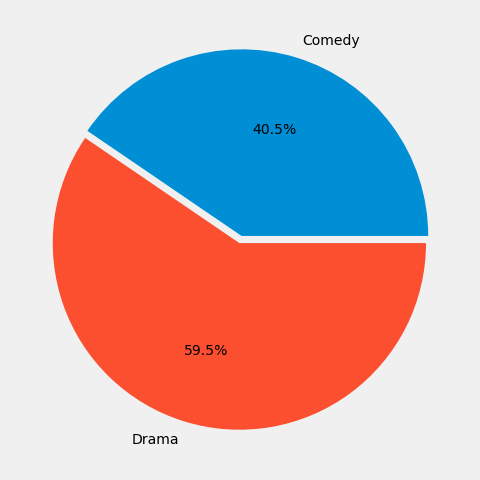

In [48]:
top_popular_genre = yearly_popular_genre.groupby('Genres')['Count'].mean()

fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(top_popular_genre, labels=top_popular_genre.index,\
             autopct='%1.1f%%', explode=[.02]*len(top_popular_genre));

Drama and comedy are the top 2 most popular genres each year, according to the research data, with percentage rates of 59.5 and 40.5 respectively.

### Research Question 5
- Which key words attract more popularity?

In [49]:
# Key word with high popularity
keyword_pop = spilldown('keywords')

In [50]:
# Top 10 keywords that attract more popularity
top10_keywords = keyword_pop.head(10)
top10_keywords

keywords
velociraptor              11.121115
nihilism                   8.947905
space colony               7.460604
evil mastermind            7.404165
times square               6.907148
descendant                 6.887883
lightsaber                 6.174727
caste system               6.145020
middle-earth (tolkien)     6.112635
dna                        5.970229
Name: popularity, dtype: float64

#### Visualization of the top 10 keywords that have highest movies popularity

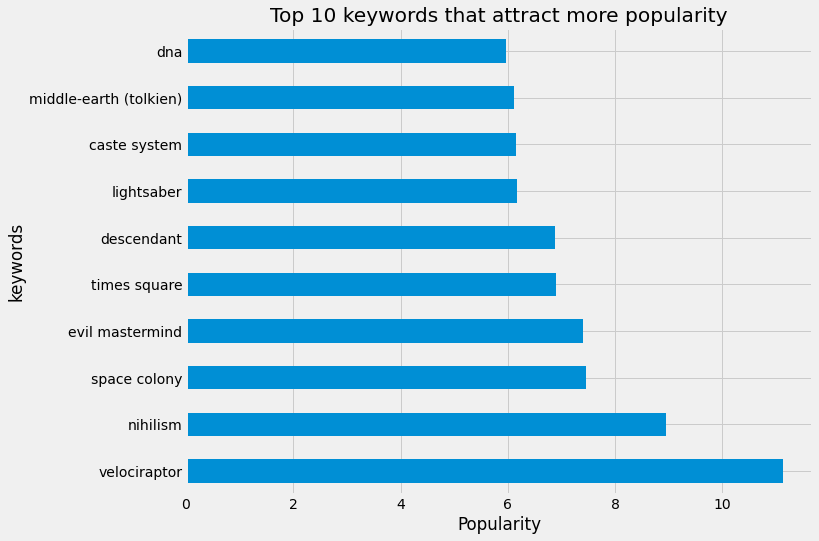

In [51]:
top10_keywords.plot.barh(figsize=(10, 8))
plt.title('Top 10 keywords that attract more popularity')
plt.xlabel('Popularity');

According to the above figure, the most prevalent keywords are "velociraptor", "nihilism", "space colony" and "evil mastermind".

### Research Question 6

Which Genres has the highest and lowest vote count

In [52]:
genres_vote_count = spilldown(column='genres', include='vote_count')

In [53]:
# Top 10 Genres vote count
top10_gen_votecount = pd.DataFrame(genres_vote_count.head(10))
top10_gen_votecount

,vote_count
genres,
Adventure,543.687861
Science Fiction,471.108275
Fantasy,456.454762
Action,417.643400
Animation,339.369530
Family,302.833790
Crime,289.638953
War,282.484496
Thriller,269.314639


In [54]:
def genre_visual_votecount(val:pd.Series, title: str):
    """
        Function to display the genres that attract more vote count.
        
    """
    ax = val.plot.barh(figsize=(8, 8))
    plt.xlabel('Vote count mean')
    plt.ylabel('Genres')
    plt.title(title)
    ax.bar_label(ax.containers[0], fmt='%.2f')


#### Top 10 Genres with highest vote count

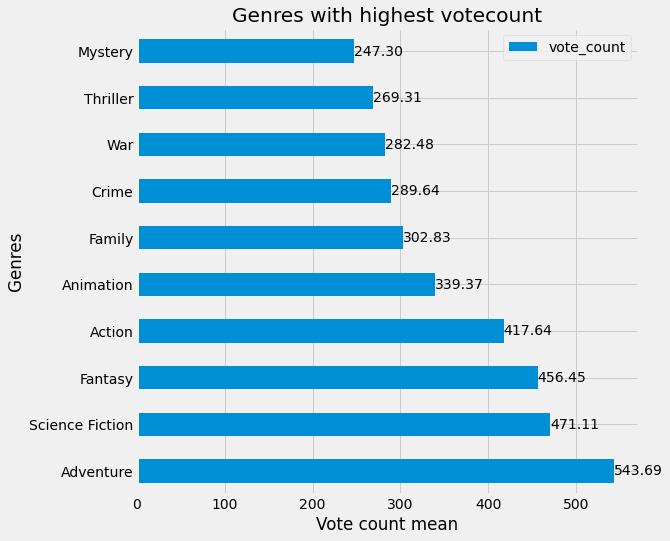

In [55]:
genre_visual_votecount(top10_gen_votecount, 'Genres with highest votecount')

#### 10 Genres with the least vote count

In [56]:
least_gen_votecount = genres_vote_count.tail(10)

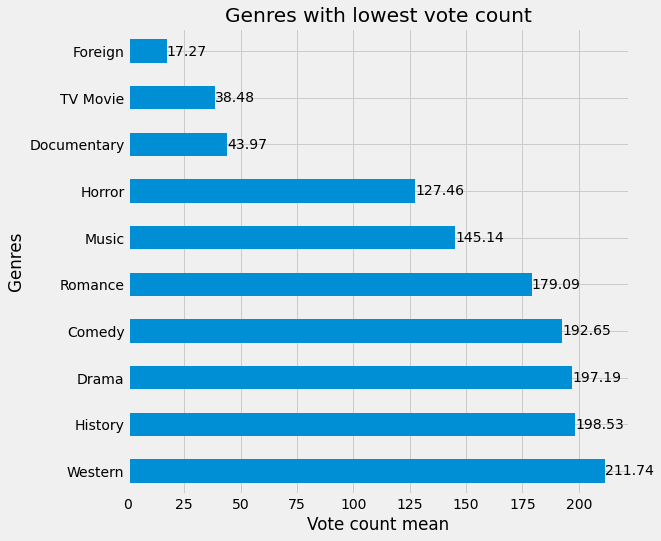

In [57]:
genre_visual_votecount(least_gen_votecount, "Genres with lowest vote count")

As can be seen from the images above, foreign, TV movies, and documentaries have received the least votes, while adventure, science fiction, fantasy, and action films have received the most.

### Research Question 7
- Which year has the most movie released?

Year with highest movie release

In [58]:
most_release_year = df.groupby('release_year').count()['runtime'] 
# Since count return the same value for all columns, then runtime will be taken as the count of the release year

In [59]:
yearly_movie_release = most_release_year.sort_values(ascending=False)

yearly_movie_release.head(5) # Top 5 Years with highest movie released

release_year
2014    635
2013    567
2015    558
2012    498
2009    474
Name: runtime, dtype: int64

In [60]:
def ym_release_visual(data: pd.Series, title: str = 'Yearly movies released'):
    """
        Yearly movies released visual

    """
    fig, ax = plt.subplots(figsize=(12, 8))
    data.plot.bar(ax=ax)
    plt.xlabel('Year')
    plt.ylabel('Movies released')
    ax.bar_label(ax.containers[0], label_type='center')
    plt.title(title)

#### Year with highest movies released

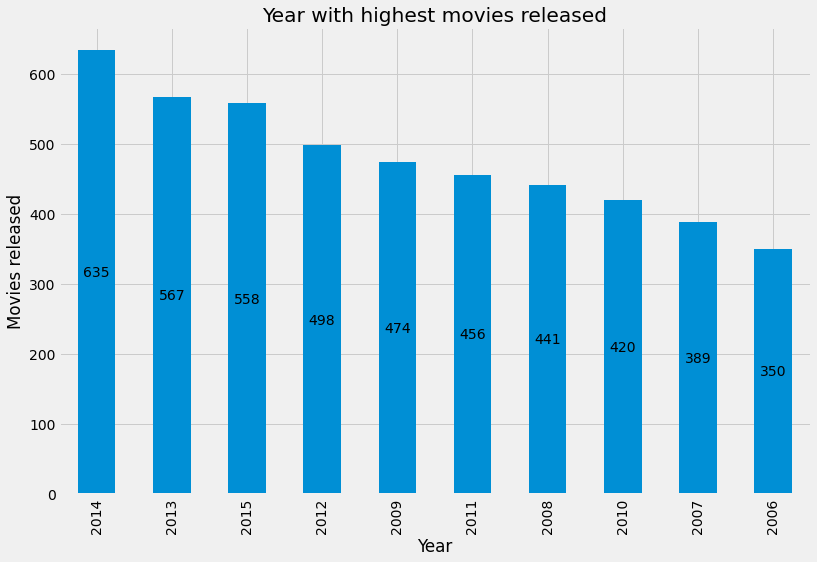

In [61]:
ym_release_visual(yearly_movie_release.head(10),
                     title="Year with highest movies released")

#### Year with lowest movies released

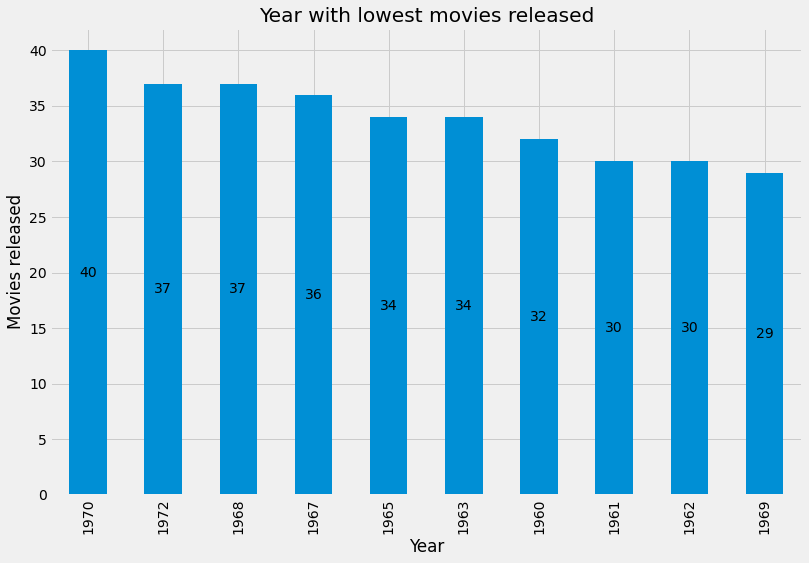

In [62]:
ym_release_visual(yearly_movie_release.tail(10),
                     title="Year with lowest movies released")

The biggest number of movies have been released in the 2000s and beyond, which is a significant increase over 1990s releases.

### Research Question 8
- Top 10 production companies with highest movies popularity
- 10 production companies with lowest movies popularity

In [63]:
def cm_popularity_visual(data:pd.DataFrame, title:str = "Company movies popularity"):
    """
        Visualization of companies movies popularity

    """
    data.plot.barh(figsize=(12, 8))
    plt.ylabel('Production company')
    plt.xlabel('Movies popularity')
    plt.title(title)

    

#### Top 10 production companies with highest movies popularity

In [64]:
# Production company movies popularity
pcm_popularity = spilldown('production_companies')

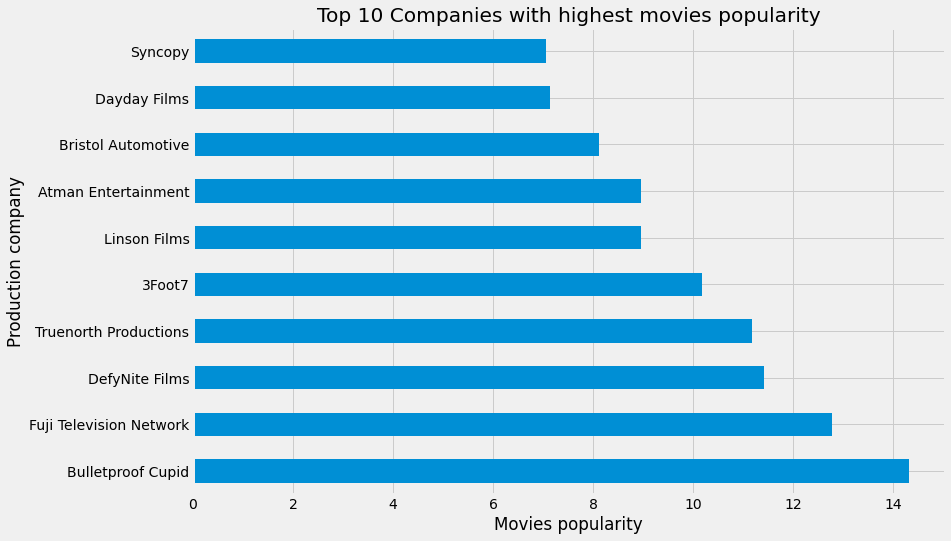

In [65]:
cm_popularity_visual(pcm_popularity.head(10), title="Top 10 Companies with highest movies popularity")

#### 10 production companies with lowest movies popularity

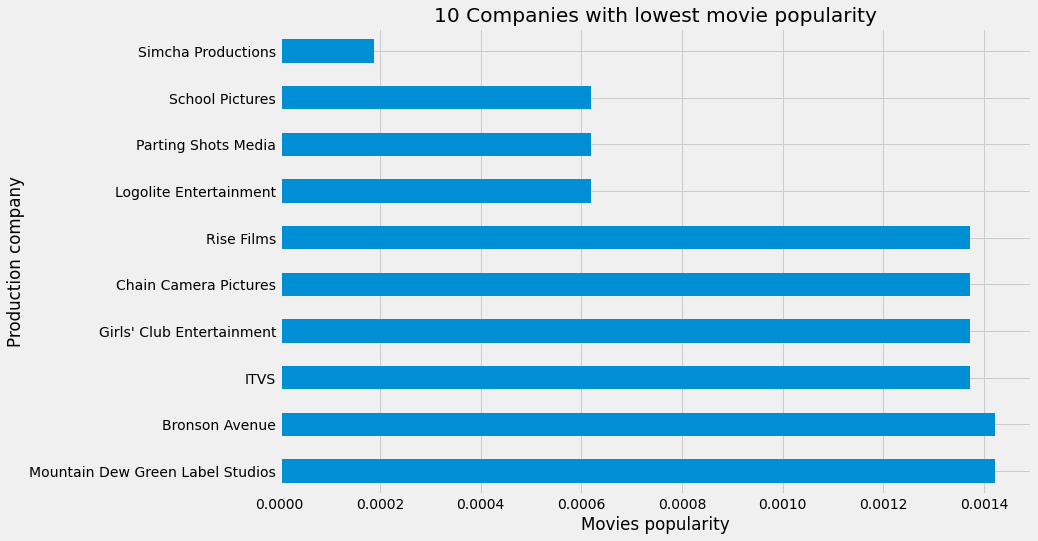

In [66]:
cm_popularity_visual(pcm_popularity.tail(10), title="10 Companies with lowest movie popularity")

The Top 4 Movie Production Companies are: 
- Bulletproof Cupid
- The Fuji Television Network
- Truenorth Productions and DefyNite Films

While the following companies have the least popular films:
- Simcha Productions
- School Pictures
- Parting Shots Media and Logolite Entertainment

### Research Question 9
- Does a film with a big budget generate a lot of money?

- Does the length of a movie affect how much money it makes?

- Will the length of the movie be determined by its budget?

In [67]:
def relationship_visual(x: str, y: str, title: str=None):
    """
        This function will plot a scatter plot which includes a tread line to show the linear relationship of both x and y axis.

    """
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.regplot(x=x, y=y, data=df, ax=ax)
    ax.set_xlabel((x:=x.title()))
    ax.set_ylabel((y:=y.title()))
    if not title:
        ax.set_title(f'Relationship between {x} and {y}')
    else:
        ax.set_title(title)

#### Correlation between budget and revenue in the year 2010

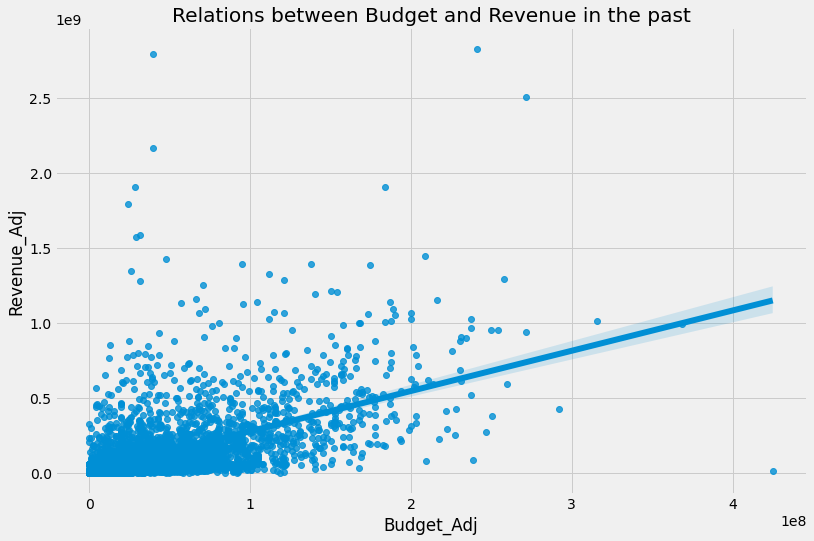

In [68]:
relationship_visual(x='budget_adj', y='revenue_adj', title="Relations between Budget and Revenue in the past")

The budget and revenue for movies in 2010 have a positive relationship, which means that the more the expenditure, the higher the revenue.

#### Current relationship between movies budget and revenue

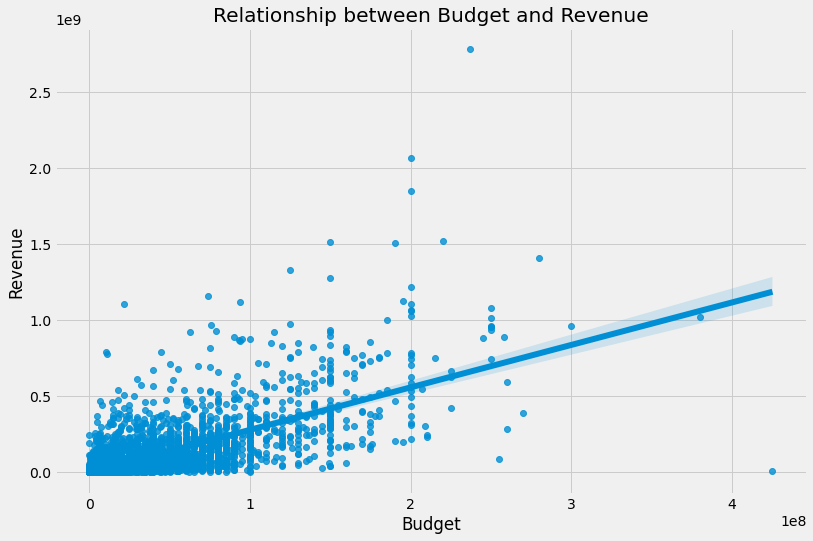

In [69]:
relationship_visual(x='budget', y='revenue')

There is still a good association between the past and present budget and revenues.

#### Does the length of a movie affect its price tag?

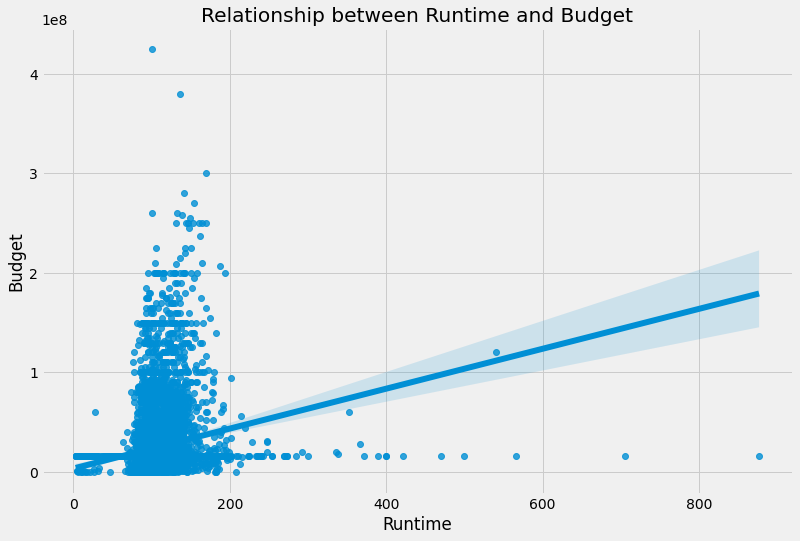

In [70]:
relationship_visual('runtime', 'budget')

The regression trend demonstrates that films with long runtimes have a reasonable operating budget.

#### Does the length of a movie affect how much money it makes?

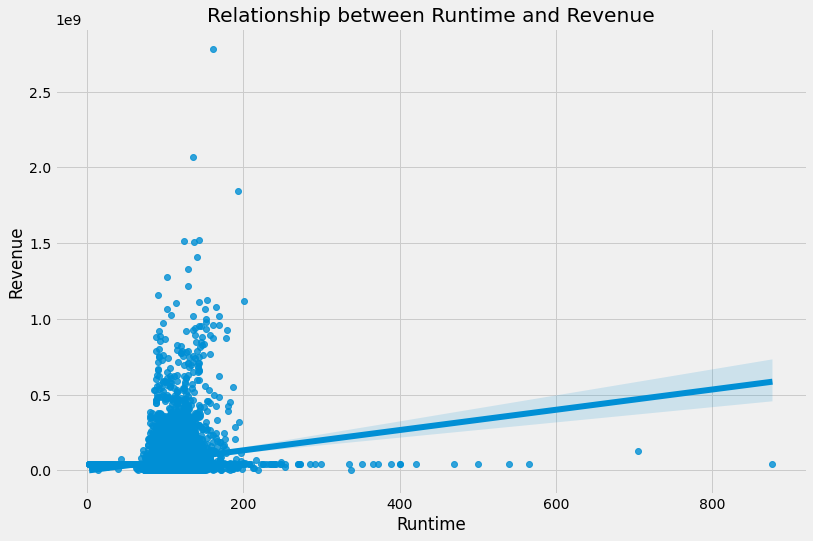

In [71]:
relationship_visual('runtime', 'revenue')

As can be seen, there is a lower correlation between movie runtime and revenue than between budget and revenue. Looking at the scatter plot alone shows no obvious correlation between the two features.

<a id='limitation'></a>
## Project Limitation
- As of right now, the movies database only has data for the years 1960 to 2015. The research hypothesis is not guaranteed to be accurate at all times by this study. 

- Because of the short amount of time provided for this study, additional problems and conclusions would have been identified.

- It's possible that certain genre labels have appeared in a few hugely popular movies, giving them the same amount of popularity as the most prevalent ones. Assigned that the popularity of each movie genre was given the same weight in this analysis, this is plausible.

<a id='conclusions'></a>
## Conclusions

The actor with the most appearances in various films throughout the history of motion picture production is James Franco. In 2013 he was used 10 times, while in 2015 he was used 6 times.
The most popular movie genres are drama and comedy, with annual rates of 59.5 percent and 40.5 percent, respectively. This analysis shows that the majority of production companies with the most well-liked films always include titles in both the drama and comedy categories.
The first director with the biggest film popularity, Colin Trevorrow, cannot disparage the force of both drama and comedy. Movies are always positioned in the adventure, science fiction, fantasy, and action genres to receive more votes because viewers of these films consistently cast more votes than viewers of other genres.

More movies are being released today than in the past due to increased movie popularity and vote count during the 2000s.
The majority of the filmmakers who oversaw blockbuster films are currently employed by Bulletproof Cupid, the Fuji Television Network, and True North Productions, respectively.
The data demonstrates that films with high budgets consistently return high income, whereas those with low budgets consistently produce low revenue. The length of a movie does not affect its financial success.

The most influential genres in film history are drama and comedy, although movies can also use the tags adventure, science fiction, fantasy, and action to increase their popularity.

**Reference**
- Simplilearn, (August 2, 2022). A Complete Guide to Data Visualization in Python With Libraries, Chart, Graphs & More. Simplilearn tutorial. https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python#:~:text=Python%20offers%20several%20plotting%20libraries,most%20simple%20and%20effective%20way.

- Buckywoody, (December 30, 2015). The Hardest Thing In Data Science. Buckwoody wordpress site. https://buckwoody.wordpress.com/2015/12/30/the-hardest-thing-in-data-science/
